In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [30]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [31]:
df.shape

(11251, 15)

In [32]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


 # Data Cleaning

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [40]:
#drop blank columns
df.drop(['Status',  'unnamed1'],axis=1,inplace=True)

In [42]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [44]:
df.shape

(11251, 13)

In [46]:
#drop null
df.dropna(inplace=True)

In [48]:
df.shape

(11239, 13)

In [50]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Data Analysis

### Gender

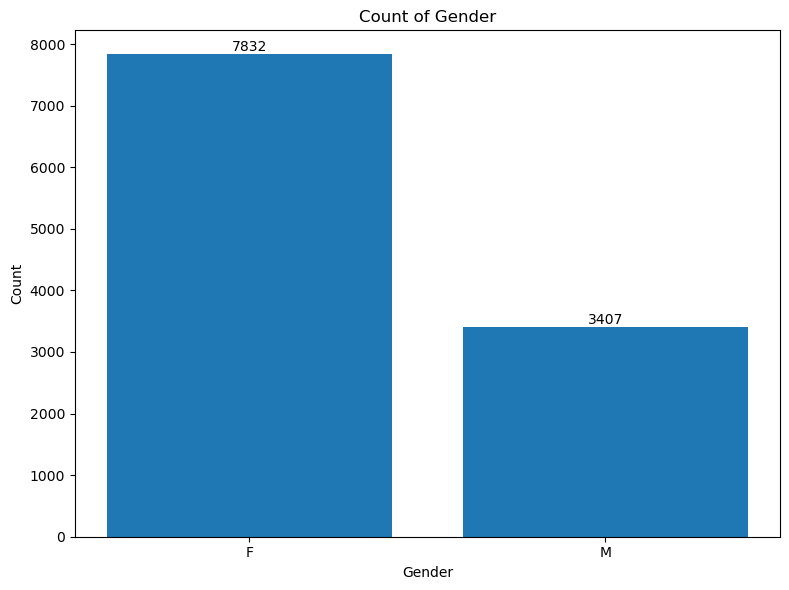

In [54]:
# Create a simple bar chart of gender counts with labels
plt.figure(figsize=(8, 6))
counts = df['Gender'].value_counts()
bars = plt.bar(counts.index, counts.values)
plt.bar_label(bars)

# Add title and labels
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

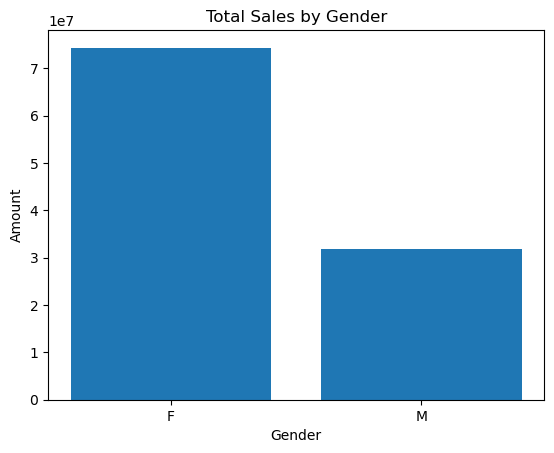

In [56]:
# Group data by Gender and sum the Amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Create bar chart
plt.bar(sales_gen['Gender'], sales_gen['Amount'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Total Sales by Gender')

plt.show()

In [58]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


##### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

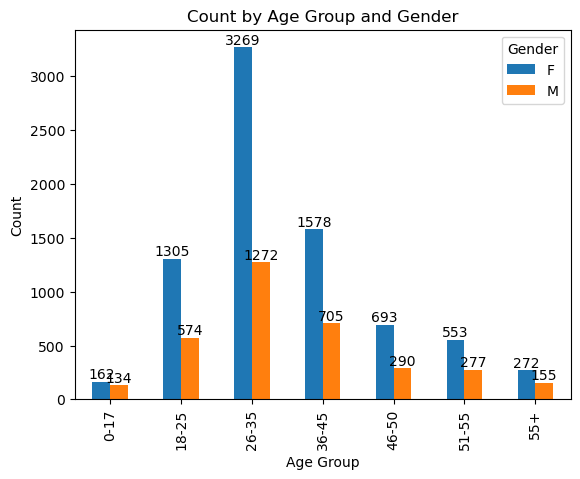

In [62]:
# Count values by Age Group and Gender
age_gender_counts = df.groupby(['Age Group', 'Gender']).size().unstack()

# Create bar chart
ax = age_gender_counts.plot(kind='bar')

# Add labels on top of each bar
for container in ax.containers:
    plt.bar_label(container)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count by Age Group and Gender')

plt.show()

### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

## State

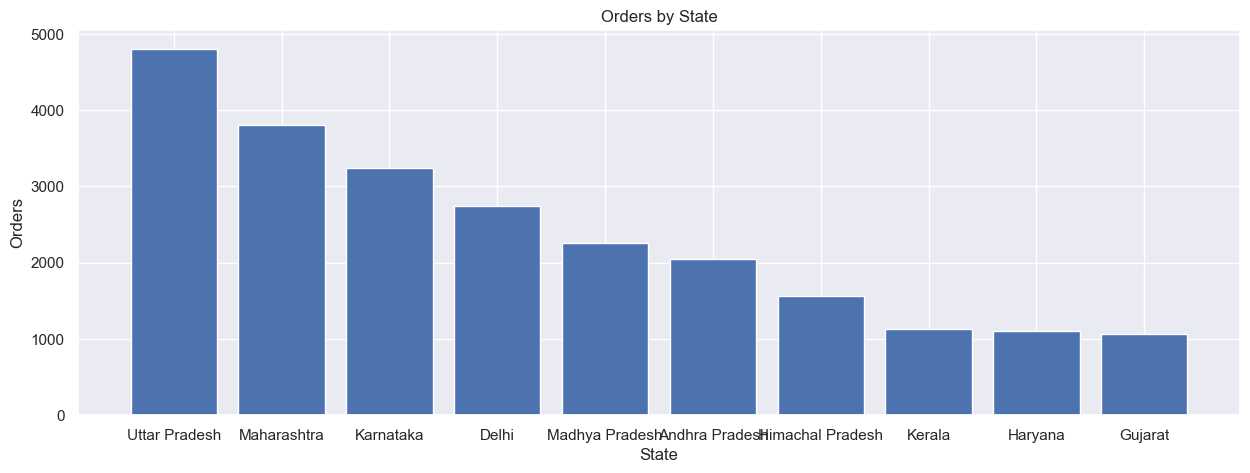

In [77]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Create a figure with the specified size
plt.figure(figsize=(15, 5))

# Use matplotlib's bar function instead of barplot
plt.bar(sales_state['State'], sales_state['Orders'])

# Add labels and title for better visualization
plt.xlabel('State')
plt.ylabel('Orders')
plt.title('Orders by State')

# Display the plot
plt.show()

## Marital Status

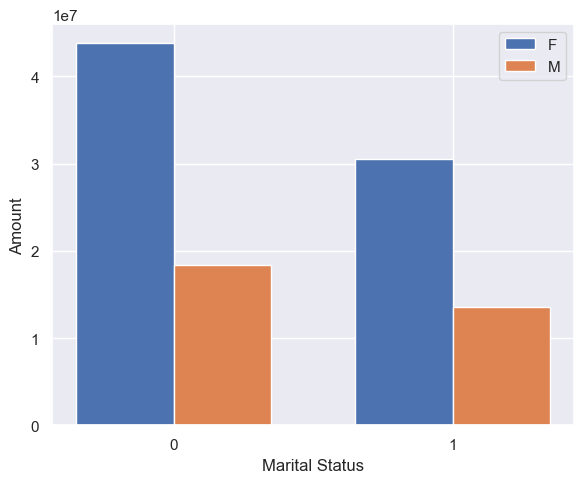

In [87]:
# Group data by Marital_Status and Gender
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Create figure with specified size
plt.figure(figsize=(6, 5))

# Get unique categories
marital_statuses = sales_state['Marital_Status'].unique()
genders = sales_state['Gender'].unique()

# Set width of bars and positions
bar_width = 0.35
x = np.arange(len(marital_statuses))

# Create bars for each gender
for i, gender in enumerate(genders):
    gender_data = sales_state[sales_state['Gender'] == gender]
    # Match marital status order
    amounts = [gender_data[gender_data['Marital_Status'] == status]['Amount'].sum() 
               for status in marital_statuses]
    
    plt.bar(x + i*bar_width, amounts, bar_width, label=gender)

# Add labels and legend
plt.xlabel('Marital Status')
plt.ylabel('Amount')
plt.xticks(x + bar_width/2, marital_statuses)
plt.legend()

plt.tight_layout()
plt.show()

## From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## Occupation

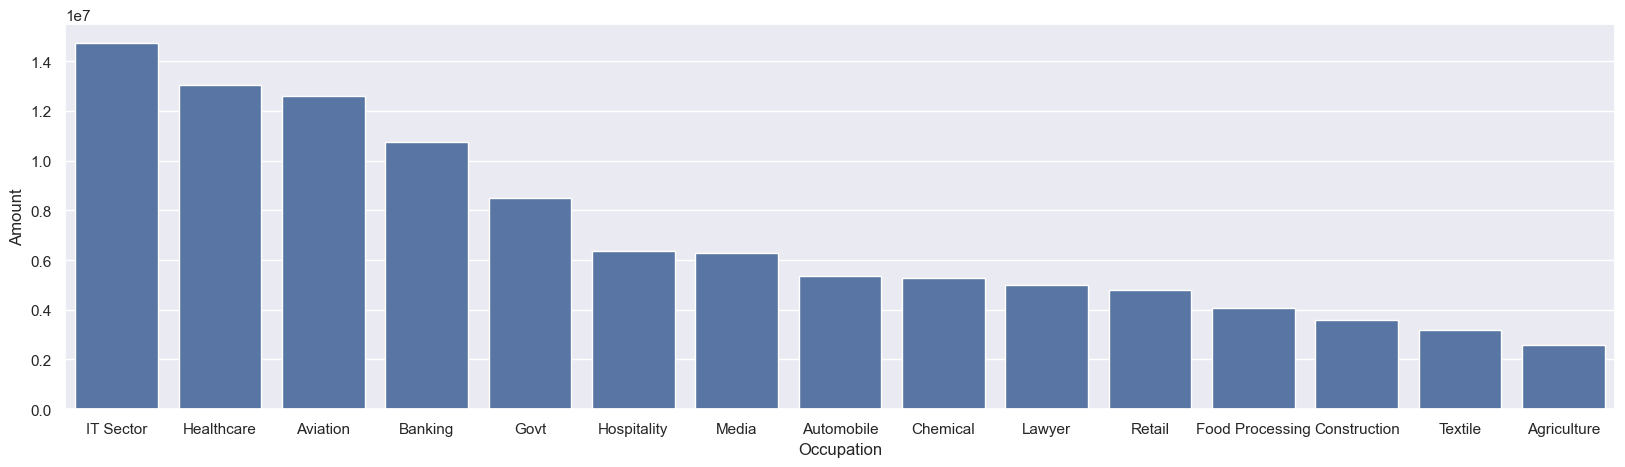

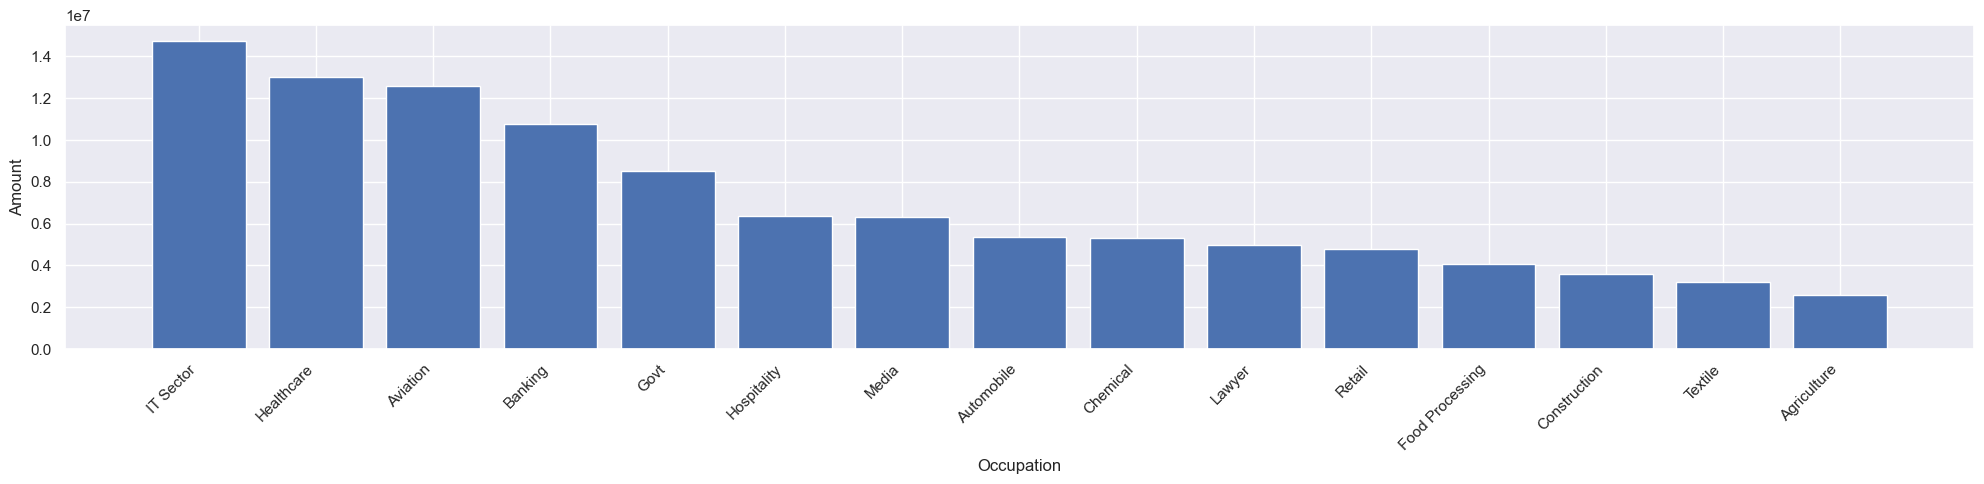

In [85]:
# Group data and sort by Amount
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Create figure with specified size
plt.figure(figsize=(20, 5))

# Create bar plot
plt.bar(sales_state['Occupation'], sales_state['Amount'])

# Add labels
plt.xlabel('Occupation')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Show plot
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

### Product category

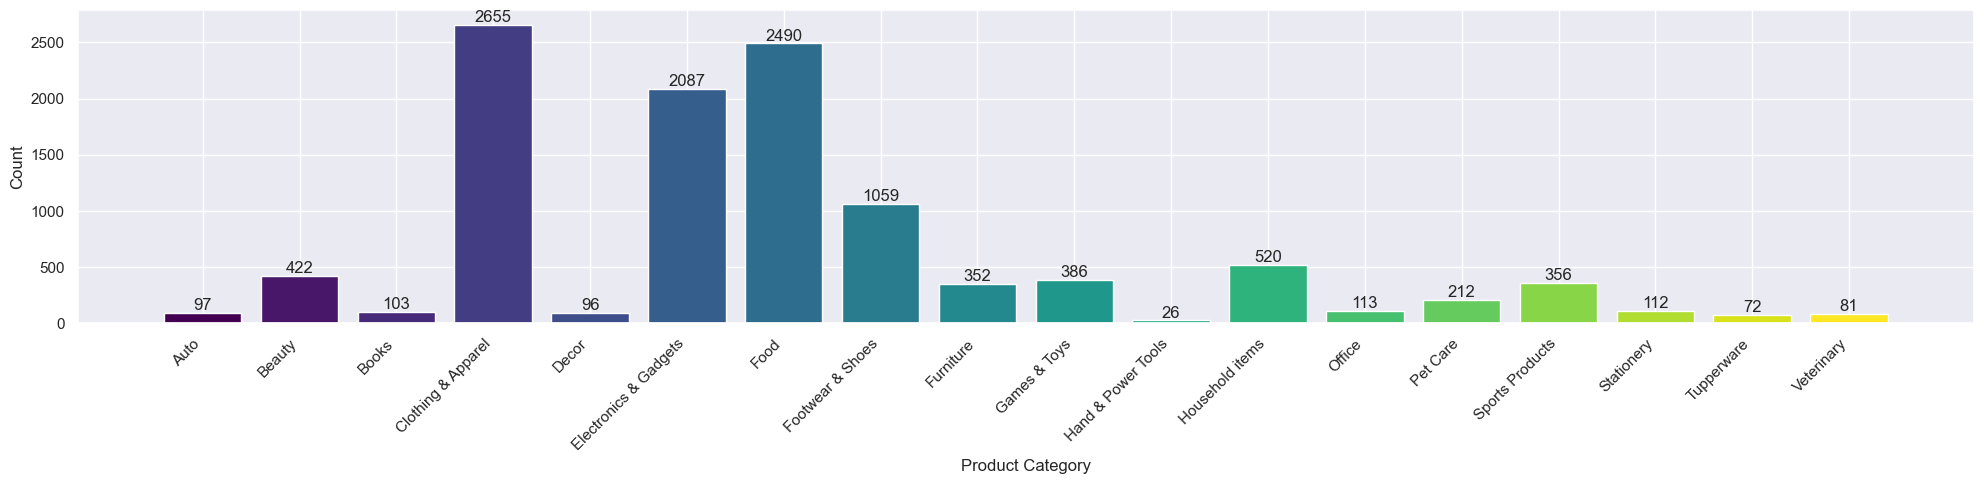

In [92]:
# Create figure with specified size
plt.figure(figsize=(20, 5))

# Count values in Product_Category
category_counts = df['Product_Category'].value_counts().sort_index()

# Create bar plot with a colorful palette
colors = plt.cm.viridis(np.linspace(0, 1, len(category_counts)))  # Using viridis colormap
bars = plt.bar(category_counts.index, category_counts.values, color=colors)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Add labels
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels if needed

plt.tight_layout()
plt.show()

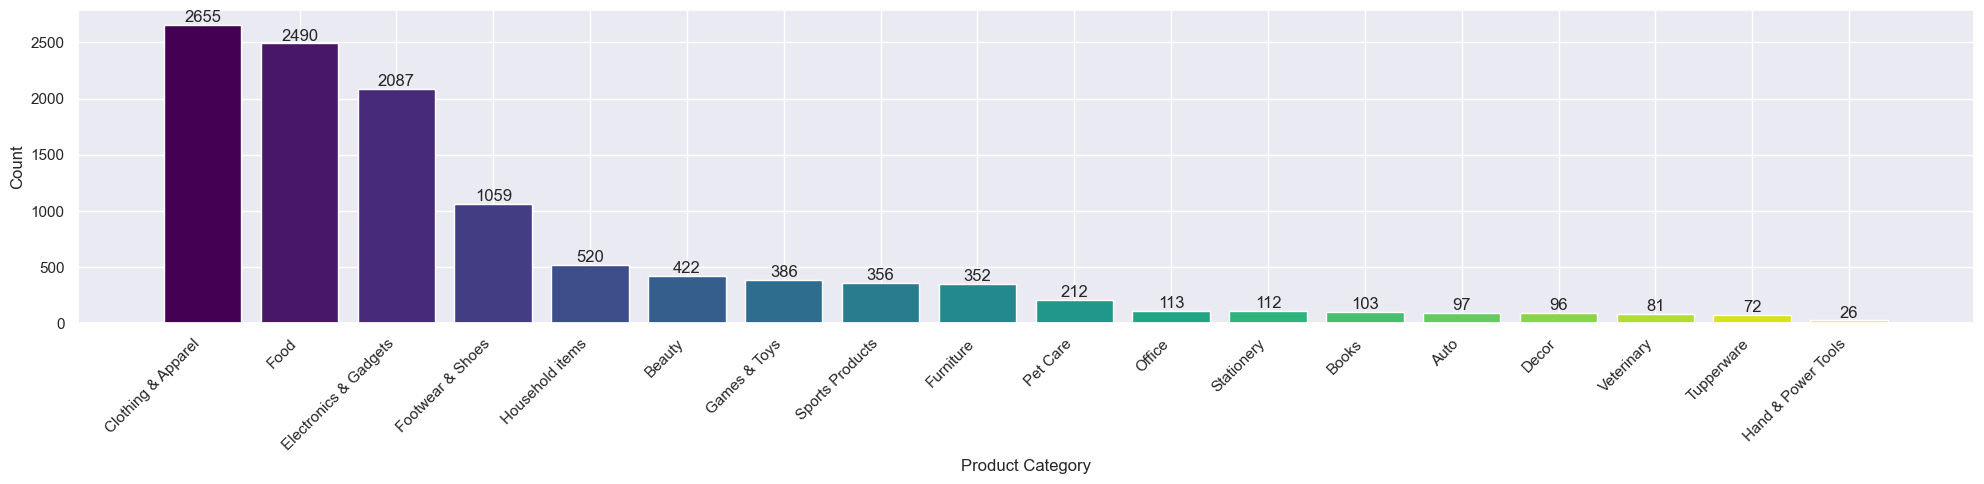

In [94]:
# Create figure with specified size
plt.figure(figsize=(20, 5))

# Count values in Product_Category and sort in descending order
category_counts = df['Product_Category'].value_counts().sort_values(ascending=False)

# Create bar plot with a colorful palette
colors = plt.cm.viridis(np.linspace(0, 1, len(category_counts)))  # Using viridis colormap
bars = plt.bar(category_counts.index, category_counts.values, color=colors)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Add labels
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()
plt.show()

# From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

# Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.

github- https://github.com/Ayushmaan05/Diwali_sales_analysis.git
Thank you!